In [82]:
# @title Parameters
# With BigQuery DataFrames, you can use many familiar Pandas methods, but the
# processing happens BigQuery rather than the runtime, allowing you to work with larger
# DataFrames that would otherwise not fit in the runtime memory.
# Learn more here: https://cloud.google.com/python/docs/reference/bigframes/latest
import pandas as pd
import bigframes.pandas as bf

bf.options.bigquery.location = "asia-southeast1" #this variable is set based on the dataset you chose to query
bf.options.bigquery.project = "curious-pointer-419406" #this variable is set based on the dataset you chose to query

JobId = "job202404090913"

In [83]:
%%bigquery df --project curious-pointer-419406
SELECT * FROM patents_processed.thailand_dip_2_features WHERE JobId = "job202404090913"

Query is running:   0%|          |

Downloading:   0%|          |

In [84]:
df["ApplicationId"] = df["ApplicationId"].astype("int64")
df

,JobId,ApplicationId,Title,chemical,polymer,home_chemical,industrial_chemical,argriculture,automotive,bottle_caps,...,expoy_composite,packaging,large_blow,non_woven,pipe,pipe_fittings,wire,has_chemical_process,has_manufacturing_process,products
0,job202404090913,101000350,การใช้ประโยชน์ไพริมิดินคาร์บอกซาไมด์ในฐานะเป็น...,True,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[pyrimidine carboxamide compounds]
1,job202404090913,101000067,สารประกอบฆ่าราชนิดใหม่,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[]
2,job202404090913,1801003839,สารประกอบเดพซิเพพไทด์ที่มีฤทธิ์ฆ่าพยาธิ,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[]
3,job202404090913,8901001266,สารผสมสำหรับรักษาความสดของผลไม้และผัก,True,<NA>,<NA>,<NA>,True,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[A mixture for preserving the freshness of fru...
4,job202404090913,1802000101,รถปลูกข้าว,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[rice planting vehicle]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15888,job202404090913,2101003616,<p>วิธีการสำหรับการผลิตเส้นใยสำหรับการเสริมแรง...,True,True,False,True,False,True,False,...,False,False,False,False,False,False,False,True,True,"[fiber for reinforcing rubber, thermoplastic e..."
15889,job202404090913,9601003960,สารผสมบิทูเมนและขบวนการเตรียม,True,True,False,True,False,True,False,...,False,False,False,False,False,False,False,True,True,"[bitumen composition, asphalt paving mixtures]"
15890,job202404090913,1901005124,ลามิเนต,True,True,False,True,True,True,False,...,False,False,False,False,True,False,False,True,True,"[Laminate, Pipe]"
15891,job202404090913,401000300,วัสดุเชิงแสง พอลิยูเรีย/ยูรีเธน และ วิธีการสำห...,True,True,False,True,False,True,False,...,False,False,False,False,False,False,False,True,True,"[impact-resistant, optically clear polyurethan..."


In [85]:
df_cluster = df.drop(columns=["JobId","Title", "products"])
df_cluster.fillna(False, inplace=True)
df_cluster = df_cluster.astype(int)

df_cluster


,ApplicationId,chemical,polymer,home_chemical,industrial_chemical,argriculture,automotive,bottle_caps,bottle,paint,...,home_appliances,expoy_composite,packaging,large_blow,non_woven,pipe,pipe_fittings,wire,has_chemical_process,has_manufacturing_process
0,101000350,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,101000067,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1801003839,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8901001266,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1802000101,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15888,2101003616,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
15889,9601003960,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
15890,1901005124,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
15891,401000300,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [86]:
df_cluster_indexed = df_cluster.set_index("ApplicationId")
df_cluster_indexed.index

Int64Index([ 101000350,  101000067, 1801003839, 8901001266, 1802000101,
            8901000642,  601006216,  602000654, 2002001504,  501002901,
            ...
            9301001444, 2001006745, 1601002890, 1601001487, 9901003680,
            2101003616, 9601003960, 1901005124,  401000300, 9701002868],
           dtype='int64', name='ApplicationId', length=15893)

In [87]:
# @title Getting Embeddings { display-mode: "both" }

%%bigquery df_embeddings --project curious-pointer-419406
SELECT
  CAST(ApplicationId As STRING) As ApplicationId,
  SummaryEmbedding
FROM `curious-pointer-419406.patents_processed.thailand_dip_3_embeddings`
WHERE ARRAY_LENGTH(SummaryEmbedding) = 768

Query is running:   0%|          |

Downloading:   0%|          |

In [88]:
# @title Explode the Embedding Features into columns
df_embeddings_exp = df_embeddings.explode('SummaryEmbedding')

df_embeddings_exp['row_id'] = df_embeddings_exp.groupby('ApplicationId').cumcount()

pivot_df = df_embeddings_exp.pivot(index='ApplicationId', columns='row_id', values='SummaryEmbedding')

pivot_df = pivot_df = pivot_df.iloc[:, :768]
pivot_df.index = pivot_df.index.astype("int64")
pivot_df.columns = pivot_df.columns.astype("str")

In [89]:
# @title Scale Value to 0...1 into scaled_df
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_pivot_df = scaler.fit_transform(pivot_df)

scaled_df = pd.DataFrame(scaled_pivot_df, index=pivot_df.index, columns=pivot_df.columns)
scaled_df

row_id,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
ApplicationId,,,,,,,,,,,,,,,,,,,,,
1000005,0.621653,0.468811,0.357984,0.551328,0.441340,0.613441,0.576490,0.580347,0.483057,0.402658,...,0.694145,0.539565,0.513878,0.692599,0.518626,0.493837,0.287018,0.524587,0.665712,0.416408
1000014,0.466543,0.659725,0.337926,0.545793,0.612930,0.501865,0.422530,0.512254,0.297026,0.327943,...,0.527082,0.408818,0.323862,0.581017,0.507708,0.544944,0.690888,0.614014,0.437955,0.453088
1000098,0.320379,0.674094,0.414478,0.564114,0.498539,0.663582,0.168981,0.576485,0.558423,0.362799,...,0.489030,0.489157,0.599232,0.552919,0.385300,0.569844,0.538427,0.509477,0.238531,0.470669
1000116,0.512021,0.608393,0.477292,0.380252,0.313358,0.450525,0.259241,0.612565,0.552047,0.368703,...,0.553254,0.412104,0.620687,0.696824,0.677218,0.554368,0.471654,0.300716,0.478761,0.363825
1000142,0.606412,0.454988,0.470522,0.708249,0.614139,0.405826,0.439376,0.276206,0.317157,0.229512,...,0.505484,0.464646,0.439416,0.414667,0.614143,0.463616,0.617491,0.499562,0.597198,0.501159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9903000032,0.252219,0.441554,0.312463,0.413183,0.545051,0.581908,0.457633,0.590981,0.438689,0.252148,...,0.423771,0.326410,0.430540,0.618392,0.566289,0.611749,0.425736,0.641319,0.270515,0.501870
9903000053,0.456089,0.504179,0.191496,0.421510,0.470661,0.760276,0.427048,0.606935,0.662498,0.566820,...,0.540405,0.436089,0.499527,0.489225,0.508689,0.727423,0.524276,0.618676,0.500797,0.583664
9903000102,0.407766,0.493013,0.561796,0.282072,0.514492,0.620564,0.478932,0.372269,0.663464,0.724837,...,0.558570,0.545527,0.631222,0.441754,0.312891,0.503702,0.378633,0.332754,0.581866,0.398021


In [90]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 3 components
pca = PCA(n_components=32)
scaled_df_pca = pca.fit_transform(scaled_df)

scaled_df_pca = scaler.fit_transform(scaled_df_pca)
scaled_df_pca = pd.DataFrame(scaled_df_pca, index=scaled_df.index)
scaled_df_pca

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
ApplicationId,,,,,,,,,,,,,,,,,,,,,
1000005,0.284739,0.620268,0.484690,0.444448,0.335524,0.301437,0.711925,0.745772,0.644831,0.634237,...,0.429244,0.394318,0.542280,0.792382,0.702083,0.658564,0.541952,0.271768,0.493168,0.657797
1000014,0.338371,0.164784,0.541723,0.305000,0.245353,0.497482,0.508486,0.247402,0.642371,0.414873,...,0.373503,0.342757,0.209612,0.569229,0.322912,0.361246,0.472049,0.572717,0.617195,0.372143
1000098,0.319680,0.156408,0.680329,0.593653,0.590949,0.554103,0.559305,0.604833,0.627682,0.527661,...,0.532496,0.546301,0.386093,0.383488,0.375133,0.421134,0.575064,0.594794,0.687407,0.582709
1000116,0.346918,0.214244,0.549595,0.370905,0.615384,0.441288,0.533589,0.705647,0.625626,0.606590,...,0.451469,0.511628,0.401473,0.461313,0.337580,0.550358,0.557646,0.590586,0.394028,0.747745
1000142,0.306101,0.528267,0.753955,0.155750,0.525578,0.151989,0.273741,0.289197,0.415013,0.345752,...,0.489855,0.387816,0.521363,0.361812,0.729175,0.491169,0.347945,0.583804,0.432292,0.454249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9903000032,0.462600,0.522204,0.772300,0.700783,0.237782,0.464940,0.574849,0.671821,0.417618,0.571504,...,0.533123,0.620509,0.495186,0.426769,0.639819,0.421998,0.490216,0.554913,0.495857,0.363282
9903000053,0.516380,0.569538,0.892530,0.477611,0.414831,0.420912,0.439135,0.677340,0.557498,0.637321,...,0.624744,0.537082,0.544016,0.725918,0.275153,0.426018,0.475993,0.622337,0.216685,0.548535
9903000102,0.576438,0.488542,0.336389,0.526745,0.700532,0.644290,0.595876,0.507061,0.489778,0.410300,...,0.660387,0.597277,0.542251,0.639490,0.552299,0.590348,0.460262,0.397672,0.340898,0.350087


In [91]:
df_cluster_indexed_boost = df_cluster_indexed.copy()
df_cluster_indexed_boost["polymer"] = df_cluster_indexed_boost["polymer"] * 1.5
df_cluster_indexed_boost["chemical"] = df_cluster_indexed_boost["chemical"] * -1.5
df_cluster_indexed_boost

,chemical,polymer,home_chemical,industrial_chemical,argriculture,automotive,bottle_caps,bottle,paint,coating,home_appliances,expoy_composite,packaging,large_blow,non_woven,pipe,pipe_fittings,wire,has_chemical_process,has_manufacturing_process
ApplicationId,,,,,,,,,,,,,,,,,,,,
101000350,-1.5,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
101000067,-0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1801003839,-0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8901001266,-1.5,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1802000101,-0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101003616,-1.5,1.5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
9601003960,-1.5,1.5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1901005124,-1.5,1.5,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [92]:
df_merged_cluster = pd.merge(scaled_df_pca, df_cluster_indexed_boost, left_index=True, right_index=True, how="inner")
df_merged_cluster.columns = df_merged_cluster.columns.astype(str)
df_merged_cluster

,0,1,2,3,4,5,6,7,8,9,...,home_appliances,expoy_composite,packaging,large_blow,non_woven,pipe,pipe_fittings,wire,has_chemical_process,has_manufacturing_process
ApplicationId,,,,,,,,,,,,,,,,,,,,,
1000005,0.284739,0.620268,0.484690,0.444448,0.335524,0.301437,0.711925,0.745772,0.644831,0.634237,...,0,0,0,0,0,0,0,0,1,1
1000014,0.338371,0.164784,0.541723,0.305000,0.245353,0.497482,0.508486,0.247402,0.642371,0.414873,...,0,0,0,0,0,0,0,0,1,1
1000098,0.319680,0.156408,0.680329,0.593653,0.590949,0.554103,0.559305,0.604833,0.627682,0.527661,...,0,0,0,0,0,0,0,0,1,1
1000116,0.346918,0.214244,0.549595,0.370905,0.615384,0.441288,0.533589,0.705647,0.625626,0.606590,...,0,0,0,0,0,0,0,0,1,1
1000142,0.306101,0.528267,0.753955,0.155750,0.525578,0.151989,0.273741,0.289197,0.415013,0.345752,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9903000032,0.462600,0.522204,0.772300,0.700783,0.237782,0.464940,0.574849,0.671821,0.417618,0.571504,...,1,0,0,0,0,0,0,0,0,1
9903000053,0.516380,0.569538,0.892530,0.477611,0.414831,0.420912,0.439135,0.677340,0.557498,0.637321,...,1,0,0,0,0,0,0,0,0,0
9903000102,0.576438,0.488542,0.336389,0.526745,0.700532,0.644290,0.595876,0.507061,0.489778,0.410300,...,0,0,0,0,0,0,0,0,0,0


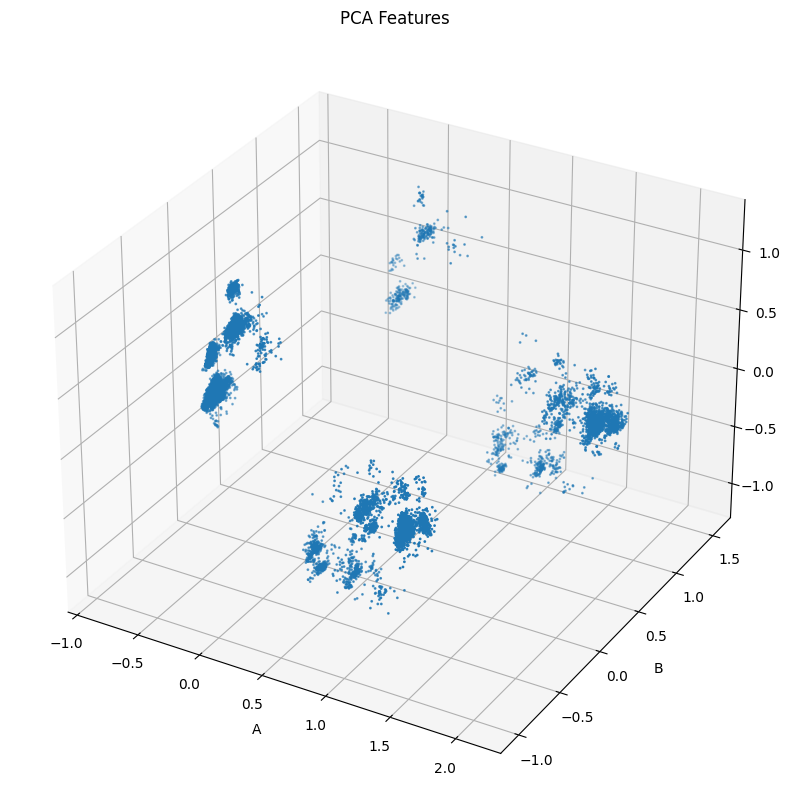

In [93]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Apply PCA to reduce dimensionality to 3 components
pca = PCA(n_components=3)
pca_3 = pca.fit_transform(df_merged_cluster)

# Create 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_3[:, 0], pca_3[:, 1], pca_3[:, 2], s=1)

# Set labels and title
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
ax.set_title('PCA Features')

# Show plot
plt.show()

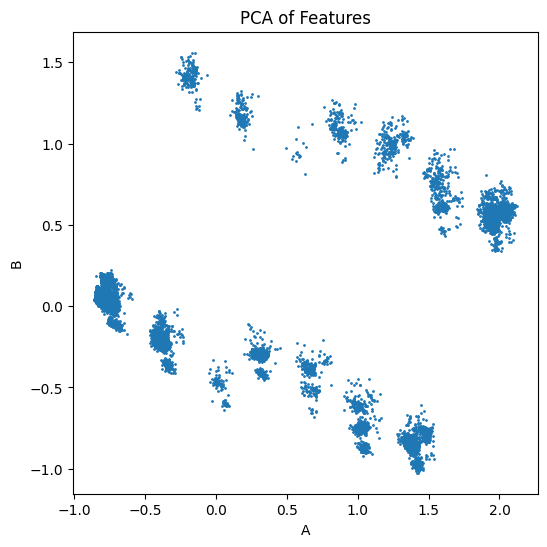

In [94]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
pca_2 = pca.fit_transform(df_merged_cluster)

# Create 3D plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(pca_2[:, 0], pca_2[:, 1], s=1)

# Set labels and title
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_title('PCA of Features')

# Show plot
plt.show()

In [95]:
# @title Vanilla DBSCAN over df_merged_cluster - DOES NOT WORK if using Embedding Directly

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# Define range of epsilon and minimum samples values to evaluate
eps_range = [0.7,0.8,0.9,0.95,0.98] #good before PCA to 3
min_samples_range = [5,7,10,12,15]
silhouette_scores = np.zeros((len(eps_range), len(min_samples_range)))

# Initialize variables to keep track of the best performing DBSCAN instance and its silhouette score
best_dbscan = None
best_silhouette_score = -1
best_outliers = 99999999
best_labels = None

# Compute silhouette scores for each combination of hyperparameters
print("Vanilla DBSCAN")
i = 0;
for eps in eps_range:
    j = 0
    for min_samples in min_samples_range:
        print( f"Hyper Parameters: {eps}, {min_samples}")

        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(df_merged_cluster)

        num_clusters = len(np.unique(cluster_labels[cluster_labels != -1]))
        num_outliers = (cluster_labels == -1).sum()
        print(f"> Clusters: {num_clusters}")
        print(f"> Outliers: {num_outliers}")

        if num_clusters > 1:
          silhouette = silhouette_score(df_merged_cluster, cluster_labels)
        else:
          silhouette = -1

        silhouette_scores[i, j] = silhouette
        j = j + 1

        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_dbscan = dbscan
            best_labels = cluster_labels
            print("New Best")

    i = i + 1


Vanilla DBSCAN
Hyper Parameters: 0.7, 5
> Clusters: 92
> Outliers: 3055
New Best
Hyper Parameters: 0.7, 7
> Clusters: 78
> Outliers: 3457
Hyper Parameters: 0.7, 10
> Clusters: 49
> Outliers: 4040
Hyper Parameters: 0.7, 12
> Clusters: 39
> Outliers: 4351
Hyper Parameters: 0.7, 15
> Clusters: 39
> Outliers: 4625
Hyper Parameters: 0.8, 5
> Clusters: 108
> Outliers: 1563
New Best
Hyper Parameters: 0.8, 7
> Clusters: 82
> Outliers: 1811
Hyper Parameters: 0.8, 10
> Clusters: 67
> Outliers: 2057
Hyper Parameters: 0.8, 12
> Clusters: 63
> Outliers: 2175
Hyper Parameters: 0.8, 15
> Clusters: 54
> Outliers: 2460
Hyper Parameters: 0.9, 5
> Clusters: 130
> Outliers: 935
New Best
Hyper Parameters: 0.9, 7
> Clusters: 98
> Outliers: 1150
Hyper Parameters: 0.9, 10
> Clusters: 82
> Outliers: 1326
Hyper Parameters: 0.9, 12
> Clusters: 74
> Outliers: 1455
Hyper Parameters: 0.9, 15
> Clusters: 64
> Outliers: 1649
Hyper Parameters: 0.95, 5
> Clusters: 134
> Outliers: 816
New Best
Hyper Parameters: 0.95, 7


In [135]:
cluster_labels_df = pd.DataFrame(best_labels, columns=['Cluster'])

df_final = pd.DataFrame(df_merged_cluster.index)

df_final = pd.concat( [df_final, cluster_labels_df], axis=1)
df_final.index = df_final["ApplicationId"]

df_final["pca_3"] = [row.tolist() for row in pca_3]
df_final["JobId"] = JobId

df_final

,ApplicationId,Cluster,pca_3,JobId
ApplicationId,,,,
1000005,1000005,0,"[0.009224177685020341, -0.4808987911516233, 0....",job202404090913
1000014,1000014,1,"[1.3785741322342644, -0.8654369799729608, -0.0...",job202404090913
1000098,1000098,2,"[2.065453571382683, 0.41786445787270754, 0.127...",job202404090913
1000116,1000116,3,"[1.9671768965404193, 0.4000390168446979, 0.140...",job202404090913
1000142,1000142,4,"[-0.7100737248514526, -0.025799301934164385, -...",job202404090913
...,...,...,...,...
9903000032,9903000032,47,"[-0.4267960634810419, -0.25354638885521763, 0....",job202404090913
9903000053,9903000053,12,"[-0.788993810735503, -0.021585790161052998, -0...",job202404090913
9903000102,9903000102,10,"[-0.18525661711520344, 1.3998682331129995, 0.0...",job202404090913


In [159]:
grouped_df = df_final.groupby('Cluster')['ApplicationId'].apply(list).reset_index()
grouped_df

,Cluster,ApplicationId
0,-1,"[1000157, 1000450, 1001079, 1001232, 1001790, ..."
1,0,"[1000005, 1002170, 201000672, 301002670, 50100..."
2,1,"[1000014, 1000546, 1000789, 1000809, 1001835, ..."
3,2,"[1000098, 501004817, 1101001153, 1601006107, 1..."
4,3,"[1000116, 1002148, 301001674, 601002633, 60100..."
...,...,...
137,136,"[801001061, 901000830, 1201001151, 1201004543,..."
138,137,"[1201002787, 1301004151, 1901002200, 810100022..."
139,138,"[701004581, 701004925, 801001610, 8501000466, ..."
140,139,"[301001332, 1801001618, 8901000279, 9701004195..."


In [160]:
cluster_centroids = []

for index, row in grouped_df.iterrows():
  patent_pca_list = []
  for item in list(set(row["ApplicationId"])):
    matching = df_final.loc[item]["pca_3"]
    if isinstance(matching, pd.Series):
      patent_pca_list.append( matching.iloc[0] )
    else:
      patent_pca_list.append( matching )

  array_3d = np.array(patent_pca_list)
  centroid = np.mean(array_3d, axis=0)
  cluster_centroids.append(centroid)

grouped_df["ClusterCentoid"] = cluster_centroids
grouped_df

,Cluster,ApplicationId,ClusterCentoid
0,-1,"[1000157, 1000450, 1001079, 1001232, 1001790, ...","[0.7416585880422155, 0.23101256445618576, 0.06..."
1,0,"[1000005, 1002170, 201000672, 301002670, 50100...","[0.010933448214616212, -0.4648649383798733, 0...."
2,1,"[1000014, 1000546, 1000789, 1000809, 1001835, ...","[1.3828151382614953, -0.8538682803258058, -0.0..."
3,2,"[1000098, 501004817, 1101001153, 1601006107, 1...","[2.069688373334328, 0.4325081828383542, 0.1422..."
4,3,"[1000116, 1002148, 301001674, 601002633, 60100...","[1.9784332567987641, 0.3819584382747049, 0.129..."
...,...,...,...
137,136,"[801001061, 901000830, 1201001151, 1201004543,...","[0.6230416681398233, -0.5238816622844126, -0.0..."
138,137,"[1201002787, 1301004151, 1901002200, 810100022...","[2.0233062801028803, 0.5809941748921469, 0.214..."
139,138,"[701004581, 701004925, 801001610, 8501000466, ...","[1.9115096312905575, 0.6808505497032794, 0.125..."
140,139,"[301001332, 1801001618, 8901000279, 9701004195...","[0.9739222470995802, -0.6010144153811083, -0.0..."


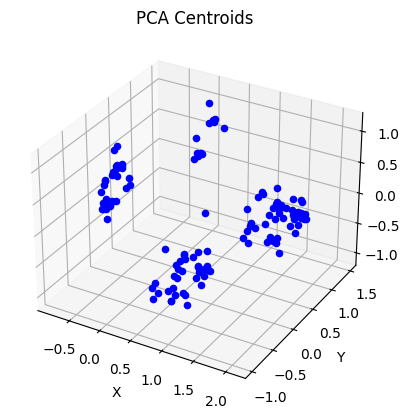

In [171]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract X, Y, Z coordinates from each row and plot them
for i, row in grouped_df.iterrows():
    coord = row['ClusterCentoid']
    ax.scatter(coord[0], coord[1], coord[2], c='b', marker='o')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('PCA Centroids')

plt.show()

In [168]:
%%bigquery
DELETE FROM patents_processed.thailand_dip_4_clusters WHERE JobId = "job202404090913"

Query is running:   0%|          |

""


In [169]:
from google.cloud import bigquery

client = bigquery.Client()

job_config = bigquery.LoadJobConfig(

    write_disposition=bigquery.WriteDisposition.WRITE_APPEND,  # Replace existing table
)

toInsert = grouped_df.copy()
toInsert["JobId"] = df_final["JobId"].iloc[0]
toInsert.rename(columns={'ApplicationId': 'PatentApplicationIds'}, inplace=True)
toInsert.rename(columns={'Cluster': 'ClusterLabel'}, inplace=True)

display(toInsert)

job = client.load_table_from_dataframe(toInsert, "curious-pointer-419406.patents_processed.thailand_dip_4_clusters", job_config=job_config)
job.result()

,ClusterLabel,PatentApplicationIds,ClusterCentoid,JobId
0,-1,"[1000157, 1000450, 1001079, 1001232, 1001790, ...","[0.7416585880422155, 0.23101256445618576, 0.06...",job202404090913
1,0,"[1000005, 1002170, 201000672, 301002670, 50100...","[0.010933448214616212, -0.4648649383798733, 0....",job202404090913
2,1,"[1000014, 1000546, 1000789, 1000809, 1001835, ...","[1.3828151382614953, -0.8538682803258058, -0.0...",job202404090913
3,2,"[1000098, 501004817, 1101001153, 1601006107, 1...","[2.069688373334328, 0.4325081828383542, 0.1422...",job202404090913
4,3,"[1000116, 1002148, 301001674, 601002633, 60100...","[1.9784332567987641, 0.3819584382747049, 0.129...",job202404090913
...,...,...,...,...
137,136,"[801001061, 901000830, 1201001151, 1201004543,...","[0.6230416681398233, -0.5238816622844126, -0.0...",job202404090913
138,137,"[1201002787, 1301004151, 1901002200, 810100022...","[2.0233062801028803, 0.5809941748921469, 0.214...",job202404090913
139,138,"[701004581, 701004925, 801001610, 8501000466, ...","[1.9115096312905575, 0.6808505497032794, 0.125...",job202404090913
140,139,"[301001332, 1801001618, 8901000279, 9701004195...","[0.9739222470995802, -0.6010144153811083, -0.0...",job202404090913


LoadJob<project=curious-pointer-419406, location=asia-southeast1, id=856f7501-87bc-4d14-b0c5-c7ebd1cad19e>